In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from bs4 import BeautifulSoup
import requests
import codecs
import os
from lxml import etree
import json
import unicodedata
import string

path = '/content/drive/MyDrive/ДИПЛОМ/Списки компаний/Парсеры для карточек компаний/'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_excel('/content/drive/MyDrive/ДИПЛОМ/Списки компаний/Парсеры для карточек компаний/company_list_fst_iteration.xlsx', converters={'ИНН':str})
data['ИНН'] = data['ИНН'].astype(str)
data.drop(['№', 'Столбец1', 'Есть выгрузка', 'Место по итогам 2020 года',
           'Объем реализации в 2021 году (млн. рублей)*', 'Объем реализации в 2020 году (млн. рублей)*',
           'Темпы роста выручки за год (%)', 'Объем реализации в 2021 году (млн. долларов)', 'Прибыль до налогообложения в 2021 году (млн. рублей)',
           'Чистая прибыль в 2021 году (млн. рублей)', 'Тип отчетности'], axis=1, inplace=True)
data.rename(columns={'Название':'company_file','ИНН':'inn_file','Отрасль':'industry_file'}, inplace=True)
data

,company_file,inn_file,industry_file
0,"«КТЗ», промышленный оператор",9704082895,оптовая торговля
1,«Автомир-Трейд»,7730569353,розничная торговля
2,«Джи Пи Си Рус»,7703400140,платежный сервис
3,«Самотлорнефтепромхим»,8603118208,сервисные компании
4,«Мосметрострой»,7710068052,"инжиниринг, промышленно-инфраструктурное строи..."
...,...,...,...
583,X5 Group,7733571872,розничная торговля
584,РЖД,7708503727,транспорт и логистика
585,"«Роснефть», нефтяная компания",7706107510,нефтяная и нефтегазовая промышленность
586,«ЛУКОЙЛ»,7708004767,нефтяная и нефтегазовая промышленность


In [4]:
list_of_smi_publications = pd.DataFrame(os.listdir(path+'company_smi_publications'), dtype=str)
list_of_smi_publications.rename(columns={0:'inn_smi_publications'}, inplace=True)
list_of_smi_publications['inn_smi_publications'] = list_of_smi_publications['inn_smi_publications'].str.replace('.html', '', regex=False).astype(str)
list_of_smi_publications

,inn_smi_publications
0,9704082895
1,7730569353
2,7703400140
3,8603118208
4,7710068052
...,...
558,7708503727
559,7706107510
560,7708004767
561,7736050003


In [5]:
list_of_company_main_cards = pd.DataFrame(os.listdir(path+'company_main_cards'))
list_of_company_main_cards.rename(columns={0:'inn_company_main_cards'}, inplace=True)
list_of_company_main_cards['inn_company_main_cards'] = list_of_company_main_cards['inn_company_main_cards'].str.replace('.html', '', regex=False)
list_of_company_main_cards

,inn_company_main_cards
0,9704082895
1,7730569353
2,7703400140
3,8603118208
4,7710068052
...,...
574,7708503727
575,7706107510
576,7708004767
577,7736050003


In [6]:
all_inn_data = pd.merge(list_of_smi_publications, list_of_company_main_cards, how='inner', left_on='inn_smi_publications', right_on='inn_company_main_cards')
all_inn_data

,inn_smi_publications,inn_company_main_cards
0,9704082895,9704082895
1,7730569353,7730569353
2,7703400140,7703400140
3,8603118208,8603118208
4,7710068052,7710068052
...,...,...
558,7708503727,7708503727
559,7706107510,7706107510
560,7708004767,7708004767
561,7736050003,7736050003


In [7]:
data = data.merge(all_inn_data, how='left', left_on='inn_file', right_on='inn_smi_publications')
data

,company_file,inn_file,industry_file,inn_smi_publications,inn_company_main_cards
0,"«КТЗ», промышленный оператор",9704082895,оптовая торговля,9704082895,9704082895
1,«Автомир-Трейд»,7730569353,розничная торговля,7730569353,7730569353
2,«Джи Пи Си Рус»,7703400140,платежный сервис,7703400140,7703400140
3,«Самотлорнефтепромхим»,8603118208,сервисные компании,8603118208,8603118208
4,«Мосметрострой»,7710068052,"инжиниринг, промышленно-инфраструктурное строи...",7710068052,7710068052
...,...,...,...,...,...
583,X5 Group,7733571872,розничная торговля,7733571872,7733571872
584,РЖД,7708503727,транспорт и логистика,7708503727,7708503727
585,"«Роснефть», нефтяная компания",7706107510,нефтяная и нефтегазовая промышленность,7706107510,7706107510
586,«ЛУКОЙЛ»,7708004767,нефтяная и нефтегазовая промышленность,7708004767,7708004767


## Проверка: открылась ли вкладка еще при скачивании карточки

In [8]:
data_clean = data.dropna()
data_clean

,company_file,inn_file,industry_file,inn_smi_publications,inn_company_main_cards
0,"«КТЗ», промышленный оператор",9704082895,оптовая торговля,9704082895,9704082895
1,«Автомир-Трейд»,7730569353,розничная торговля,7730569353,7730569353
2,«Джи Пи Си Рус»,7703400140,платежный сервис,7703400140,7703400140
3,«Самотлорнефтепромхим»,8603118208,сервисные компании,8603118208,8603118208
4,«Мосметрострой»,7710068052,"инжиниринг, промышленно-инфраструктурное строи...",7710068052,7710068052
...,...,...,...,...,...
583,X5 Group,7733571872,розничная торговля,7733571872,7733571872
584,РЖД,7708503727,транспорт и логистика,7708503727,7708503727
585,"«Роснефть», нефтяная компания",7706107510,нефтяная и нефтегазовая промышленность,7706107510,7706107510
586,«ЛУКОЙЛ»,7708004767,нефтяная и нефтегазовая промышленность,7708004767,7708004767


In [9]:
smi_card_path = path+'company_smi_publications/'

def organizations_checker(df, row_number):
  company_inn = str(df['inn_file'].iloc[row_number])
  print(company_inn)

  with open(smi_card_path+company_inn+'.html', 'r') as f:
    contents = f.read()

    soup = BeautifulSoup(contents, 'lxml')
    dom = etree.HTML(str(soup))

  side_panels = soup.find('div', {"class": "sidebar-filters"}).find_all('div', {'class': 'sidebar-filters__section sidebar-filters__section_no-delimiter'})
  ammt_side_panels = len(side_panels)

  org_panel_id = -1
  for panel in range(ammt_side_panels):
    name = dom.xpath(f'/html/body/div/div[1]/div[1]/div[1]/div[2]/div/div/div/div/div[3]/div[2]/div[2]/div[2]/div[1]/div/div[{panel+1}]/div/div/div/button/div/text()')
    if name:
      if name[0].upper() == 'ОРГАНИЗАЦИИ':
        org_panel_id = panel+1

  flag = -1
  if 'еще' in str(side_panels[org_panel_id-1]).lower():
    flag = 0
  else:
    flag = 1

  f.close()

  return flag

In [10]:
organizations_checker_marker = []

for row in range(data_clean.shape[0]):
  flg = organizations_checker(data_clean, row)
  organizations_checker_marker.append(flg)

9704082895
7730569353
7703400140
8603118208
7710068052
1655049111
7709340842
9718221490
7719022542
7714775020
5042060699
7704758153
5029104266
7838418751
2315995868
5403145086
5047172389
7707073366
1654035998
4826022365
7705639173
1627005779
7705937571
7727696432
1655189422
6632004667
7710698978
7701655865
6663003800
7732121736
5046001101
4623004836
7717127211
5047105054
2922008546
4633037968
3814007314
3305051742
7703295463
4909105495
7810022460
5609087920
6229024796
9705118142
7707205911
6732075238
7709583813
3811125221
7730107662
7701004101
5001048893
4725001168
9715239467
4203001913
7811657720
7704160892
7709976356
0270007455
7718538045
7705189397
7705532790
7830001028
4216001565
7706236515
7703106050
7017286512
1001228754
7428007317
7702192017
7705005321
5827901723
4252012308
7710761161
7731530768
7729507377
7716641537
7705058323
8904075533
7702352454
5030041780
7814581879
3812100526
7705040943
3328430578
7327067461
7839326623
7719555477
7703248907
1303066789
7810349385
7706739893

In [ ]:
np.mean(organizations_checker_marker)

0.8528896672504378

In [11]:
data_clean['open_orgs_checker'] = organizations_checker_marker
data_clean

<ipython-input-11-1b28d6974358>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['open_orgs_checker'] = organizations_checker_marker


,company_file,inn_file,industry_file,inn_smi_publications,inn_company_main_cards,open_orgs_checker
0,"«КТЗ», промышленный оператор",9704082895,оптовая торговля,9704082895,9704082895,1
1,«Автомир-Трейд»,7730569353,розничная торговля,7730569353,7730569353,1
2,«Джи Пи Си Рус»,7703400140,платежный сервис,7703400140,7703400140,1
3,«Самотлорнефтепромхим»,8603118208,сервисные компании,8603118208,8603118208,1
4,«Мосметрострой»,7710068052,"инжиниринг, промышленно-инфраструктурное строи...",7710068052,7710068052,1
...,...,...,...,...,...,...
583,X5 Group,7733571872,розничная торговля,7733571872,7733571872,1
584,РЖД,7708503727,транспорт и логистика,7708503727,7708503727,0
585,"«Роснефть», нефтяная компания",7706107510,нефтяная и нефтегазовая промышленность,7706107510,7706107510,1
586,«ЛУКОЙЛ»,7708004767,нефтяная и нефтегазовая промышленность,7708004767,7708004767,0


In [ ]:
data_for_next_step = data.merge(data_clean[['inn_file', 'open_orgs_checker']], how='left', on='inn_file')
data_for_next_step['open_orgs_checker'] = np.where((data_for_next_step['open_orgs_checker'] == 0) | (data_for_next_step['open_orgs_checker'].isna()), np.nan, 1)
data_for_next_step.drop(['inn_smi_publications', 'inn_company_main_cards'], axis=1, inplace=True)
data_for_next_step

,company_file,inn_file,industry_file,open_orgs_checker
0,"«КТЗ», промышленный оператор",9704082895,оптовая торговля,1.0
1,«Автомир-Трейд»,7730569353,розничная торговля,1.0
2,«Джи Пи Си Рус»,7703400140,платежный сервис,1.0
3,«Самотлорнефтепромхим»,8603118208,сервисные компании,1.0
4,«Мосметрострой»,7710068052,"инжиниринг, промышленно-инфраструктурное строи...",1.0
...,...,...,...,...
583,X5 Group,7733571872,розничная торговля,1.0
584,РЖД,7708503727,транспорт и логистика,NaN
585,"«Роснефть», нефтяная компания",7706107510,нефтяная и нефтегазовая промышленность,1.0
586,«ЛУКОЙЛ»,7708004767,нефтяная и нефтегазовая промышленность,NaN


##

In [ ]:
data_for_next_step = data_for_next_step[data_for_next_step['open_orgs_checker'].isna()]
data_for_next_step

,company_file,inn_file,industry_file,open_orgs_checker
17,Торговый дом ЦУМ,7707073366,розничная торговля,NaN
21,«Аммоний»,1627005779,химическая и нефтехимическая промышленность,NaN
22,«Металлоломная компания ОМК-Экометалл»,7705937571,черная металлургия,NaN
39,«Модерн Машинери Фар Ист»,4909105495,оптовая торговля,NaN
56,АйТеко,7704160892,информационные технологии,NaN
...,...,...,...,...
581,"«Сургутнефтегаз», ПАО",8602060555,нефтяная и нефтегазовая промышленность,NaN
582,Государственная корпорация «Ростех»,7704274402,машиностроение,NaN
584,РЖД,7708503727,транспорт и логистика,NaN
586,«ЛУКОЙЛ»,7708004767,нефтяная и нефтегазовая промышленность,NaN


In [ ]:
data_for_next_step.to_excel('/content/drive/MyDrive/ДИПЛОМ/Списки компаний/Парсеры для карточек компаний/data_for_next_step_2.xlsx', index=False)

### Считывание основной информации

In [12]:
data_for_info = data.merge(data_clean[['inn_file', 'open_orgs_checker']], how='left', on='inn_file')
data_for_info = data_for_info[data_for_info['open_orgs_checker'] == 1]

In [13]:
data_for_info

,company_file,inn_file,industry_file,inn_smi_publications,inn_company_main_cards,open_orgs_checker
0,"«КТЗ», промышленный оператор",9704082895,оптовая торговля,9704082895,9704082895,1.0
1,«Автомир-Трейд»,7730569353,розничная торговля,7730569353,7730569353,1.0
2,«Джи Пи Си Рус»,7703400140,платежный сервис,7703400140,7703400140,1.0
3,«Самотлорнефтепромхим»,8603118208,сервисные компании,8603118208,8603118208,1.0
4,«Мосметрострой»,7710068052,"инжиниринг, промышленно-инфраструктурное строи...",7710068052,7710068052,1.0
...,...,...,...,...,...,...
571,"«Мегаполис», группа компаний",5003052454,оптовая торговля,5003052454,5003052454,1.0
573,«Транснефть» (ПАО),7706061801,транспорт и логистика,7706061801,7706061801,1.0
576,ПАО «Новолипецкий металлургический комбинат» (...,4823006703,черная металлургия,4823006703,4823006703,1.0
583,X5 Group,7733571872,розничная торговля,7733571872,7733571872,1.0


In [30]:
smi_card_path = path+'company_smi_publications/'

def parser(file_name):
  with open(file_name, 'r') as f:

    contents = f.read()
    soup = BeautifulSoup(contents, 'lxml')

    # Достаем неазвание компании
    company_name = soup.html.title.get_text()

    # print(file_name)
    # print(company_name)

    # Находим боковые панели со значениями
    sideback_panel = soup.find('div', {"class": "sidebar-filters"}).find_all('div', {"class": "sidebar-filters__section sidebar-filters__section_no-delimiter"})

    # Находим наименования боковых панелей
    sideback_panel_titles = soup.find('div', {"class": "sidebar-filters"}).find_all('div', {'class': 'sp-facet__title-spoiler'})

    # Находим id в которой ссодержится информация по организациям
    orgs_id = -1
    for a in range(len(sideback_panel_titles)):
      if sideback_panel_titles[a].get_text() == 'Организации':
        orgs_id = a+1 # сначала публикации

    # Тесты
    # print(len(sideback_panel))
    test = len(sideback_panel)-orgs_id
    all_orgs = []

    # Находим список организаций
    organizations = sideback_panel[orgs_id].find('div', {"class": "sp-facet"}).find_all('button', {'class':'sp-fake-link sidebar-filter'})
    for org in organizations:
      org_name = org.find('div', {'class':'sidebar-filter__label-name'}).get_text()
      ammt = org.find('div', {'class':'sidebar-filter__count'}).get_text()
      all_orgs.append([org_name, ammt])

    return (test, {file_name.split('/')[-1].split('.')[0]:all_orgs})

In [31]:
list_of_fls = (data_for_info['inn_file'] + '.html').to_list()

mentioned_orgs = {}
result = []

for fl in range(len(list_of_fls)):
  html_fl_path = smi_card_path + list_of_fls[fl]
  res, comp = parser(html_fl_path)
  result.append(res)
  mentioned_orgs.update(comp)

In [ ]:
data_for_info['company_interfax'] = list(mentioned_orgs.keys())
data_for_info

In [33]:
for key in mentioned_orgs.keys():
  for org in range(len(mentioned_orgs[key])):
    mentioned_orgs[key][org][0] = mentioned_orgs[key][org][0].replace(u'\xa0', u' ')
    mentioned_orgs[key][org][1] = mentioned_orgs[key][org][1].replace(u'\xa0', u' ')

In [38]:
with open('/content/drive/MyDrive/ДИПЛОМ/Списки компаний/Парсеры для карточек компаний/orgs_smi_info.json', 'w') as f:
    json.dump(mentioned_orgs, f)

In [35]:
company_in_org_list = []
for key in mentioned_orgs.keys():
  for value in mentioned_orgs[key]:
    company_in_org_list.append(value[0])
print(len(company_in_org_list))

company_in_org_list = list(set(company_in_org_list))
print(len(company_in_org_list))

39466
11834


In [ ]:
company_in_org_df = pd.DataFrame(company_in_org_list, columns=['company_name'])
company_in_org_df.to_csv('/content/drive/MyDrive/ДИПЛОМ/Списки компаний/Парсеры для карточек компаний/company_in_org_df_2.csv', index=False)

In [ ]:
data_for_info

,company_file,inn_file,industry_file,inn_smi_publications,inn_company_main_cards,open_orgs_checker
0,"«КТЗ», промышленный оператор",9704082895,оптовая торговля,9704082895,9704082895,1.0
1,«Автомир-Трейд»,7730569353,розничная торговля,7730569353,7730569353,1.0
2,«Джи Пи Си Рус»,7703400140,платежный сервис,7703400140,7703400140,1.0
3,«Самотлорнефтепромхим»,8603118208,сервисные компании,8603118208,8603118208,1.0
4,«Мосметрострой»,7710068052,"инжиниринг, промышленно-инфраструктурное строи...",7710068052,7710068052,1.0
...,...,...,...,...,...,...
571,"«Мегаполис», группа компаний",5003052454,оптовая торговля,5003052454,5003052454,1.0
573,«Транснефть» (ПАО),7706061801,транспорт и логистика,7706061801,7706061801,1.0
576,ПАО «Новолипецкий металлургический комбинат» (...,4823006703,черная металлургия,4823006703,4823006703,1.0
583,X5 Group,7733571872,розничная торговля,7733571872,7733571872,1.0


### Проверка соотвествия ИННов внутри файлов

In [ ]:
company_smi_publications_path = path+'company_smi_publications/'

lst_of_companies = (data_for_info['inn_file'] + '.html').to_list()

In [ ]:
def smi_inn_crawler(file_name):
  with open(company_smi_publications_path+file_name, 'r') as f:

    contents = f.read()
    soup = BeautifulSoup(contents, 'lxml')

  dom = etree.HTML(str(soup))
  company_main_info = {}
  for i in range(1,5):
    info_type = dom.xpath(f'/html/body/div/div[1]/div[1]/div[1]/div[1]/div/div/div[2]/div/span[{i}]/span/span/span/span/text()')[0][:-1]
    info = dom.xpath(f'/html/body/div/div[1]/div[1]/div[1]/div[1]/div/div/div[2]/div/span[{i}]/span/span/span/span/span/span/span/text()')[0]
    company_main_info[info_type] = info

  return company_main_info

In [ ]:
smi_info_checker = []

for comp in lst_of_companies:
  print(comp)
  smi_info_checker.append(smi_inn_crawler(comp))

In [ ]:
res = pd.DataFrame(smi_info_checker)
res

,ОГРН,ИНН,КПП,ОКПО
0,1217700375991,9704082895,210001001,51974376
1,1077761079263,7730569353,771801001,83121511
2,1157746967510,7703400140,774301001,51166895
3,1048600521408,8603118208,860301001,74733014
4,1027739002378,7710068052,770701001,01387120
...,...,...,...,...
482,1045000923967,5003052454,500301001,75219395
483,1027700049486,7706061801,770301001,00044463
484,1024800823123,4823006703,482301001,05757665
485,1067746744955,7733571872,773301001,96042871


In [ ]:
data_for_info

,company_file,inn_file,industry_file,inn_smi_publications,inn_company_main_cards,open_orgs_checker,company_interfax
0,"«КТЗ», промышленный оператор",9704082895,оптовая торговля,9704082895,9704082895,1.0,"ООО ""КТЗ"""
1,«Автомир-Трейд»,7730569353,розничная торговля,7730569353,7730569353,1.0,"ООО ""АВТОМИР-ТРЕЙД"""
2,«Джи Пи Си Рус»,7703400140,платежный сервис,7703400140,7703400140,1.0,"ООО ""ДЖИ ПИ СИ РУС"""
3,«Самотлорнефтепромхим»,8603118208,сервисные компании,8603118208,8603118208,1.0,"АО""СНПХ"""
4,«Мосметрострой»,7710068052,"инжиниринг, промышленно-инфраструктурное строи...",7710068052,7710068052,1.0,"АО ""МОСМЕТРОСТРОЙ"""
...,...,...,...,...,...,...,...
571,"«Мегаполис», группа компаний",5003052454,оптовая торговля,5003052454,5003052454,1.0,"АО ""ТК ""МЕГАПОЛИС"""
573,«Транснефть» (ПАО),7706061801,транспорт и логистика,7706061801,7706061801,1.0,"ПАО ""ТРАНСНЕФТЬ"""
576,ПАО «Новолипецкий металлургический комбинат» (...,4823006703,черная металлургия,4823006703,4823006703,1.0,"ПАО ""НЛМК"""
583,X5 Group,7733571872,розничная торговля,7733571872,7733571872,1.0,"ООО ""ИКС 5 РИТЕЙЛ ГРУПП"""


In [ ]:
res = pd.DataFrame(smi_info_checker)
test = pd.merge(res, data_for_info, right_on='inn_file', left_on='ИНН', how='right')
# test = test.dropna()

In [ ]:
test[test['ОГРН'].isna()]

,ОГРН,ИНН,КПП,ОКПО,company_file,inn_file,industry_file,inn_smi_publications,inn_company_main_cards,open_orgs_checker,company_interfax
42,NaN,NaN,NaN,NaN,Россети Северный Кавказ,2632082033,электроэнергетика,2632082033,2632082033,1.0,"АО ""ЧЕЧЕНЭНЕРГО"""
84,NaN,NaN,NaN,NaN,«Энергосбытовая компания «Восток»,7705424509,энергосбытовая деятельность,7705424509,7705424509,1.0,"АО ""ЕРИЦ ЯНАО"""
375,NaN,NaN,NaN,NaN,"«Ресурс», группа агропредприятий",7736511906,агропромышленный комплекс,7736511906,7736511906,1.0,"ООО ""ГАП ""РЕСУРС"""
399,NaN,NaN,NaN,NaN,«Пепсико Холдингс» (ООО),7705034202,пищевая промышленность,7705034202,7705034202,1.0,"ООО ""ЛЕБЕДЯНСКИЙ"""
412,NaN,NaN,NaN,NaN,"«Илим», группа",7840346335,"лесная, деревообрабатывающая и целлюлозно-бума...",7840346335,7840346335,1.0,"АО ""ИЛИМ ГОФРА"""
423,NaN,NaN,NaN,NaN,«Т2 Мобайл»,7743895280,телекоммуникации и связь,7743895280,7743895280,1.0,"АО ""МИЛЛИКОМ НТК"""
468,NaN,NaN,NaN,NaN,«Т Плюс»,6315376946,электроэнергетика,6315376946,6315376946,1.0,"ООО ""ИТ ПЛЮС"""
481,NaN,NaN,NaN,NaN,«МХК «ЕвроХим»,7721230290,химическая и нефтехимическая промышленность,7721230290,7721230290,1.0,"ООО ""ЕХСЗ-2"""


In [ ]:
test[test['inn_file'] != test['ИНН']]

,company_file,inn_file,industry_file,inn_smi_publications,inn_company_main_cards,open_orgs_checker,ОГРН,ИНН,КПП,ОКПО
10,«КРКА Фарма»,5042060699,оптовая торговля,5042060699,5042060699,1.0,1107746515887,7704758153,770901001,66886637
11,"""Торговый дом Локотех""",7704758153,оптовая торговля,7704758153,7704758153,1.0,1075029007855,5029104266,502901001,81625934
12,«Московская пивоваренная компания»,5029104266,пищевая промышленность,5029104266,5029104266,1.0,1089848051116,7838418751,783801001,07510551
13,"ЦКБ морской техники ""Рубин""",7838418751,машиностроение,7838418751,7838418751,1.0,1172375048196,2315995868,615501001,16098811
14,"""Новороссийский прокатный завод""",2315995868,черная металлургия,2315995868,2315995868,1.0,1025401306116,5403145086,771701001,54397324
...,...,...,...,...,...,...,...,...,...,...
382,«Томинский горно-обогатительный комбинат»,7403005526,цветная металлургия,7403005526,7403005526,1.0,1147746461422,7718979307,771801001,29457298
383,«Объединенная судостроительная корпорация» (АО),7838395215,машиностроение,7838395215,7838395215,1.0,1025405624430,5448100656,544801001,18014126
384,«Меркури Мода»,5032277847,розничная торговля,5032277847,5032277847,1.0,1065047056348,5047076050,504701001,96283528
385,"«Верный», сеть универсамов",7729705354,розничная торговля,7729705354,7729705354,1.0,1156658068973,6685099285,668501001,41735951


### Дальнейшая обработка

In [ ]:
reversed_data = {}
for key, values in data.items():
  for value in values:
    reversed_data.setdefault(value, set()).add(key)

In [ ]:
orgs_count = {org: [len(reversed_data[org]), reversed_data[org]] for org in reversed_data}

In [ ]:
transitions = pd.DataFrame.from_dict(orgs_count, orient='index', columns=['count', 'org'])

In [ ]:
data

,company_file,inn_file,industry_file,inn_smi_publications,inn_company_main_cards
0,"«КТЗ», промышленный оператор",9704082895,оптовая торговля,9704082895,9704082895
1,«Автомир-Трейд»,7730569353,розничная торговля,7730569353,7730569353
2,«Джи Пи Си Рус»,7703400140,платежный сервис,7703400140,7703400140
3,«Самотлорнефтепромхим»,8603118208,сервисные компании,8603118208,8603118208
4,«Мосметрострой»,7710068052,"инжиниринг, промышленно-инфраструктурное строи...",7710068052,7710068052
...,...,...,...,...,...
583,X5 Group,7733571872,розничная торговля,NaN,NaN
584,РЖД,7708503727,транспорт и логистика,NaN,NaN
585,"«Роснефть», нефтяная компания",7706107510,нефтяная и нефтегазовая промышленность,NaN,NaN
586,«ЛУКОЙЛ»,7708004767,нефтяная и нефтегазовая промышленность,NaN,NaN


In [ ]:
transitions_more_1 = transitions[transitions['count'] > 1].sort_values(by=['count'], ascending=False)
transitions_less_1 = transitions[transitions['count'] <= 1].sort_values(by=['count'], ascending=False)

In [ ]:
print(f'1) Размерноссть выборки: {transitions.shape[0]}')
print(f'2) Размерноссть выборки, в которой есть 2 и более компаний с совпадением: {transitions_more_1.shape[0]}')
print(f'3) Размерноссть выборки, в которой нет 2 и более компаний с совпадением: {transitions_less_1.shape[0]}')
print(f'Отношение 2)/3): {transitions_more_1.shape[0] / transitions_less_1.shape[0]}')

1) Размерноссть выборки: 1220
2) Размерноссть выборки, в которой есть 2 и более компаний с совпадением: 456
3) Размерноссть выборки, в которой нет 2 и более компаний с совпадением: 764
Отношение 2)/3): 0.5968586387434555


In [ ]:
transitions_more_1['count'].value_counts()

count
3    455
2      1
Name: count, dtype: int64

<Axes: >

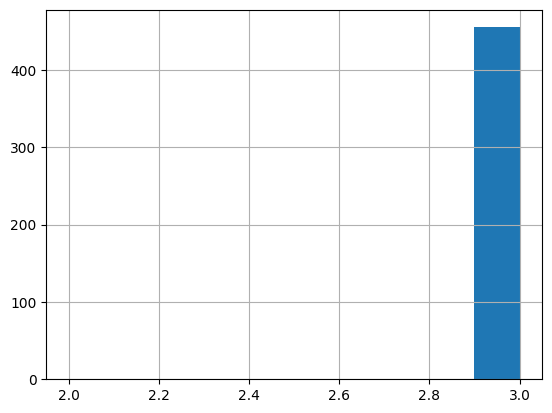

In [ ]:
transitions_more_1['count'].hist()

In [ ]:
transitions_more_1['org'].to_list()

## Основная карточка компании

In [ ]:
data_for_info

,company_file,inn_file,industry_file,inn_smi_publications,inn_company_main_cards,open_orgs_checker
0,"«КТЗ», промышленный оператор",9704082895,оптовая торговля,9704082895,9704082895,1.0
1,«Автомир-Трейд»,7730569353,розничная торговля,7730569353,7730569353,1.0
2,«Джи Пи Си Рус»,7703400140,платежный сервис,7703400140,7703400140,1.0
3,«Самотлорнефтепромхим»,8603118208,сервисные компании,8603118208,8603118208,1.0
4,«Мосметрострой»,7710068052,"инжиниринг, промышленно-инфраструктурное строи...",7710068052,7710068052,1.0
...,...,...,...,...,...,...
571,"«Мегаполис», группа компаний",5003052454,оптовая торговля,5003052454,5003052454,1.0
573,«Транснефть» (ПАО),7706061801,транспорт и логистика,7706061801,7706061801,1.0
576,ПАО «Новолипецкий металлургический комбинат» (...,4823006703,черная металлургия,4823006703,4823006703,1.0
583,X5 Group,7733571872,розничная торговля,7733571872,7733571872,1.0


In [ ]:
company_main_cards_path = path+'company_main_cards/'

lst_of_companies = (data_for_info['inn_file'] + '.html').to_list()

In [ ]:
def main_card_crawler(file_name):
  with open(company_main_cards_path+file_name, 'r') as f:

    contents = f.read()
    soup = BeautifulSoup(contents, 'lxml')

  dom = etree.HTML(str(soup))
  company_main_info = {}
  for i in range(1,5):
    info_type = dom.xpath(f'/html/body/div/div[1]/div[1]/div[1]/div[1]/div/div/div[2]/div/span[{i}]/span/span/span/span/text()')[0][:-1]
    info = dom.xpath(f'/html/body/div/div[1]/div[1]/div[1]/div[1]/div/div/div[2]/div/span[{i}]/span/span/span/span/span/span/span/text()')[0]
    company_main_info[info_type] = info

  info_types = soup.find('table', {'class':'sp-properties-form sp-properties-form_compact'}).find_all('td', {"class": "sp-properties-form__label"})
  infos= soup.find('table', {'class':'sp-properties-form sp-properties-form_compact'}).find_all('td', {"class": "sp-properties-form__value"})
  for i in range(len(info_types)):
    info_type = unicodedata.normalize("NFKD", info_types[i].text)
    info = unicodedata.normalize("NFKD", infos[i].text)
    company_main_info[info_type] = info

  return company_main_info

In [ ]:
main_card_info = []

for comp in lst_of_companies:
  print(comp)
  main_card_info.append(main_card_crawler(comp))

9704082895.html
7730569353.html
7703400140.html
8603118208.html
7710068052.html
1655049111.html
7709340842.html
9718221490.html
7719022542.html
7714775020.html
5042060699.html
7704758153.html
5029104266.html
7838418751.html
2315995868.html
5403145086.html
5047172389.html
1654035998.html
4826022365.html
7705639173.html
7727696432.html
1655189422.html
6632004667.html
7710698978.html
7701655865.html
6663003800.html
7732121736.html
5046001101.html
4623004836.html
7717127211.html
5047105054.html
2922008546.html
4633037968.html
3814007314.html
3305051742.html
7703295463.html
7810022460.html
5609087920.html
6229024796.html
9705118142.html
7707205911.html
6732075238.html
7709583813.html
3811125221.html
7730107662.html
7701004101.html
5001048893.html
4725001168.html
9715239467.html
4203001913.html
7811657720.html
7709976356.html
7718538045.html
7705189397.html
7705532790.html
7830001028.html
4216001565.html
7706236515.html
7703106050.html
7017286512.html
1001228754.html
7428007317.html
77021920

In [ ]:
main_card_info_df = pd.DataFrame(main_card_info)

In [ ]:
main_card_info_df

,ОГРН,ИНН,КПП,ОКПО,Полное наименование,Прежние наименования,Другие наименования,На английском,Адрес,Телефон,Web,ОКОПФ,Отрасль,Руководитель,E-mail,Соцсети,Управляющая компания,Бенефициар
0,1217700375991,9704082895,210001001,51974376,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""КОН...","УК ТМ, ООО","ООО ""КТЗ""","LLC ""TRACTOR PLANTS GROUP""","428003, Чувашская Республика - Чувашия, г.о. г...",+7 (499) 4262556 · Открытые данные,uk-tm.ru · 1 домен,Общества с ограниченной ответственностью,Деятельность по управлению холдинг-компаниями,Водопьянов Андрей Валентинович · генеральный...,NaN,NaN,NaN,NaN
1,1077761079263,7730569353,771801001,83121511,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АВТ...","АВТОМИР-ФИЛИ, ООО","ООО ""АВТОМИР-ТРЕЙД""","LLC ""AVTOMIR-TRADE""","107497, г. Москва, ул. Иркутская, д. 5/6 стр. ...",NaN,NaN,Общества с ограниченной ответственностью,Торговля розничная легковыми автомобилями и ле...,Рябушко Владимир Николаевич · генеральный дир...,NaN,NaN,NaN,NaN
2,1157746967510,7703400140,774301001,51166895,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ДЖИ...",NaN,"ООО ""ДЖИ ПИ СИ РУС""","OOO ""DZHI PI SI RUS""","125195, г. Москва, вн.тер.г. муниципальный ок...",+7 (928) 1214313,gpc-store.ru · 1 домен,Общества с ограниченной ответственностью,Торговля розничная моторным топливом в специал...,Сазонов Евгений Валерьевич · президент,NaN,NaN,NaN,NaN
3,1048600521408,8603118208,860301001,74733014,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""САМОТЛОРНЕФТЕПРОМХИМ""","САМОТЛОРНЕФТЕПРОМХИМ, АО","АО""СНПХ""","AO""SNPKH""","628616, Ханты-Мансийский Автономный Округ -...",+7 (3466) 671363,www.snph.biz,Непубличные акционерные общества,Предоставление услуг в области добычи нефти и ...,Галимьянов Ильфат Даниярович · генеральный ди...,snph@nptus.ru,NaN,NaN,NaN
4,1027739002378,7710068052,770701001,01387120,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""МОСКОВСКИЙ МЕТРОСТРОЙ""","МОСКОВСКИЙ МЕТРОСТРОЙ, АО","АО ""МОСМЕТРОСТРОЙ""",Mosmetrostroy JSC,"127051, г. Москва, бульвар Цветной, д. 17 пом...",+7 (495) 2767789,www.metrostroy.com · 3 домена,Непубличные акционерные общества,Строительство железных дорог и метро,Жуков Сергей Анатольевич · генеральный директор,reception-3@metrostroy.com,youtube.com/channel/uc4ckqh0buo49a-xn-_byxng,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,1045000923967,5003052454,500301001,75219395,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""ТОРГОВАЯ КОМПАНИЯ ""МЕГАП...","ТОРГОВАЯ КОМПАНИЯ МЕГАПОЛИС, АО","АО ""ТК ""МЕГАПОЛИС""",Trade Company Megapolis JSC,"142718, Московская обл., г. Видное, с. Булатни...",+7 (3473) 286350,www.gkm.ru · 19 доменов,Непубличные акционерные общества,Торговля оптовая табачными изделиями,Султанов Шамиль Рифович · генеральный директор,reception_go@gkm.ru,NaN,NaN,NaN
475,1027700049486,7706061801,770301001,00044463,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""ТРАНСНЕФТЬ""",АКЦИОНЕРНАЯ КОМПАНИЯ ПО ТРАНСПОРТУ НЕФТИ ТРАНС...,"ПАО ""ТРАНСНЕФТЬ""","OIL TRANSPORTING JOINT STOCK COMPANY ""TRANSNEFT""","123112, г. Москва, набережная Пресненская, д. ...",+7 (495) 9508067,www.transneft.ru · 21 домен,Публичные акционерные общества,Транспортирование по трубопроводам нефти и неф...,Токарев Николай Петрович · президент,maletsmn@ak.transneft.ru,vk.com/transneftofficial,NaN,NaN
476,1024800823123,4823006703,482301001,05757665,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""НОВОЛИПЕЦКИЙ ...","НОВОЛИПЕЦКИЙ МЕТАЛЛУРГИЧЕСКИЙ КОМБИНАТ, ОАО","ПАО ""НЛМК""",PJSC NOVOLIPETSK STEEL,"398040, Липецкая обл., г. Липецк, пл. Металлур...",+7 (474) 2440041,www.nlmk.ru · 52 домена,Публичные акционерные общества,Производство листового холоднокатаного стально...,Каратаев Сергей Михайлович · президент (пред...,arnautova_mn@nlmk.com,NaN,NaN,NaN
477,1067746744955,7733571872,773301001,96042871,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ИКС...","КОРПОРАТИВНЫЙ ЦЕНТР, ООО","ООО ""ИКС 5 РИТЕЙЛ ГРУПП""",X5 RETAIL GROUP,"125368, г. Москва, пер. Ангелов, д. 7На карте",+7 (495) 6628888 (Доб. 41-265),икс5.рф · 1 домен,Общества с ограниченной ответственностью,К

In [ ]:
result = pd.merge(data_for_info, main_card_info_df, left_on='inn_file', right_on='ИНН', how='inner')

In [ ]:
result.to_csv('/content/drive/MyDrive/ДИПЛОМ/Списки компаний/Итоговые фреймы данных/result.csv', sep=';', index=False)

In [ ]:
data_for_info

,company_file,inn_file,industry_file,inn_smi_publications,inn_company_main_cards,open_orgs_checker
0,"«КТЗ», промышленный оператор",9704082895,оптовая торговля,9704082895,9704082895,1.0
1,«Автомир-Трейд»,7730569353,розничная торговля,7730569353,7730569353,1.0
2,«Джи Пи Си Рус»,7703400140,платежный сервис,7703400140,7703400140,1.0
3,«Самотлорнефтепромхим»,8603118208,сервисные компании,8603118208,8603118208,1.0
4,«Мосметрострой»,7710068052,"инжиниринг, промышленно-инфраструктурное строи...",7710068052,7710068052,1.0
...,...,...,...,...,...,...
571,"«Мегаполис», группа компаний",5003052454,оптовая торговля,5003052454,5003052454,1.0
573,«Транснефть» (ПАО),7706061801,транспорт и логистика,7706061801,7706061801,1.0
576,ПАО «Новолипецкий металлургический комбинат» (...,4823006703,черная металлургия,4823006703,4823006703,1.0
583,X5 Group,7733571872,розничная торговля,7733571872,7733571872,1.0


In [ ]:
pd.merge

In [ ]:
pd.DataFrame(main_card_info)

,ОГРН,ИНН,КПП,ОКПО,Полное наименование,Прежние наименования,Другие наименования,На английском,Адрес,Телефон,Web,ОКОПФ,Отрасль,Руководитель,E-mail,Соцсети,Управляющая компания,Бенефициар
0,1217700375991,9704082895,210001001,51974376,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""КОН...","УК ТМ, ООО","ООО ""КТЗ""","LLC ""TRACTOR PLANTS GROUP""","428003, Чувашская Республика - Чувашия, г.о. г...",+7 (499) 4262556 · Открытые данные,uk-tm.ru · 1 домен,Общества с ограниченной ответственностью,Деятельность по управлению холдинг-компаниями,Водопьянов Андрей Валентинович · генеральный...,NaN,NaN,NaN,NaN
1,1077761079263,7730569353,771801001,83121511,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АВТ...","АВТОМИР-ФИЛИ, ООО","ООО ""АВТОМИР-ТРЕЙД""","LLC ""AVTOMIR-TRADE""","107497, г. Москва, ул. Иркутская, д. 5/6 стр. ...",NaN,NaN,Общества с ограниченной ответственностью,Торговля розничная легковыми автомобилями и ле...,Рябушко Владимир Николаевич · генеральный дир...,NaN,NaN,NaN,NaN
2,1157746967510,7703400140,774301001,51166895,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ДЖИ...",NaN,"ООО ""ДЖИ ПИ СИ РУС""","OOO ""DZHI PI SI RUS""","125195, г. Москва, вн.тер.г. муниципальный ок...",+7 (928) 1214313,gpc-store.ru · 1 домен,Общества с ограниченной ответственностью,Торговля розничная моторным топливом в специал...,Сазонов Евгений Валерьевич · президент,NaN,NaN,NaN,NaN
3,1048600521408,8603118208,860301001,74733014,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""САМОТЛОРНЕФТЕПРОМХИМ""","САМОТЛОРНЕФТЕПРОМХИМ, АО","АО""СНПХ""","AO""SNPKH""","628616, Ханты-Мансийский Автономный Округ -...",+7 (3466) 671363,www.snph.biz,Непубличные акционерные общества,Предоставление услуг в области добычи нефти и ...,Галимьянов Ильфат Даниярович · генеральный ди...,snph@nptus.ru,NaN,NaN,NaN
4,1027739002378,7710068052,770701001,01387120,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""МОСКОВСКИЙ МЕТРОСТРОЙ""","МОСКОВСКИЙ МЕТРОСТРОЙ, АО","АО ""МОСМЕТРОСТРОЙ""",Mosmetrostroy JSC,"127051, г. Москва, бульвар Цветной, д. 17 пом...",+7 (495) 2767789,www.metrostroy.com · 3 домена,Непубличные акционерные общества,Строительство железных дорог и метро,Жуков Сергей Анатольевич · генеральный директор,reception-3@metrostroy.com,youtube.com/channel/uc4ckqh0buo49a-xn-_byxng,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,1045000923967,5003052454,500301001,75219395,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""ТОРГОВАЯ КОМПАНИЯ ""МЕГАП...","ТОРГОВАЯ КОМПАНИЯ МЕГАПОЛИС, АО","АО ""ТК ""МЕГАПОЛИС""",Trade Company Megapolis JSC,"142718, Московская обл., г. Видное, с. Булатни...",+7 (3473) 286350,www.gkm.ru · 19 доменов,Непубличные акционерные общества,Торговля оптовая табачными изделиями,Султанов Шамиль Рифович · генеральный директор,reception_go@gkm.ru,NaN,NaN,NaN
475,1027700049486,7706061801,770301001,00044463,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""ТРАНСНЕФТЬ""",АКЦИОНЕРНАЯ КОМПАНИЯ ПО ТРАНСПОРТУ НЕФТИ ТРАНС...,"ПАО ""ТРАНСНЕФТЬ""","OIL TRANSPORTING JOINT STOCK COMPANY ""TRANSNEFT""","123112, г. Москва, набережная Пресненская, д. ...",+7 (495) 9508067,www.transneft.ru · 21 домен,Публичные акционерные общества,Транспортирование по трубопроводам нефти и неф...,Токарев Николай Петрович · президент,maletsmn@ak.transneft.ru,vk.com/transneftofficial,NaN,NaN
476,1024800823123,4823006703,482301001,05757665,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""НОВОЛИПЕЦКИЙ ...","НОВОЛИПЕЦКИЙ МЕТАЛЛУРГИЧЕСКИЙ КОМБИНАТ, ОАО","ПАО ""НЛМК""",PJSC NOVOLIPETSK STEEL,"398040, Липецкая обл., г. Липецк, пл. Металлур...",+7 (474) 2440041,www.nlmk.ru · 52 домена,Публичные акционерные общества,Производство листового холоднокатаного стально...,Каратаев Сергей Михайлович · президент (пред...,arnautova_mn@nlmk.com,NaN,NaN,NaN
477,1067746744955,7733571872,773301001,96042871,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ИКС...","КОРПОРАТИВНЫЙ ЦЕНТР, ООО","ООО ""ИКС 5 РИТЕЙЛ ГРУПП""",X5 RETAIL GROUP,"125368, г. Москва, пер. Ангелов, д. 7На карте",+7 (495) 6628888 (Доб. 41-265),икс5.рф · 1 домен,Общества с ограниченной ответственностью,К